In [1]:
# read in binary data
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys, os
sys.path.append(os.environ['raco'])
from common import dotdict, g_univ
f = open("Model_S.pkl", "rb")
di = dotdict(pickle.load(f))
f.close()

In [2]:
di.msun

1.989e+33

In [3]:
# all right let's plot some diffusion coefficients

<IPython.core.display.Javascript object>


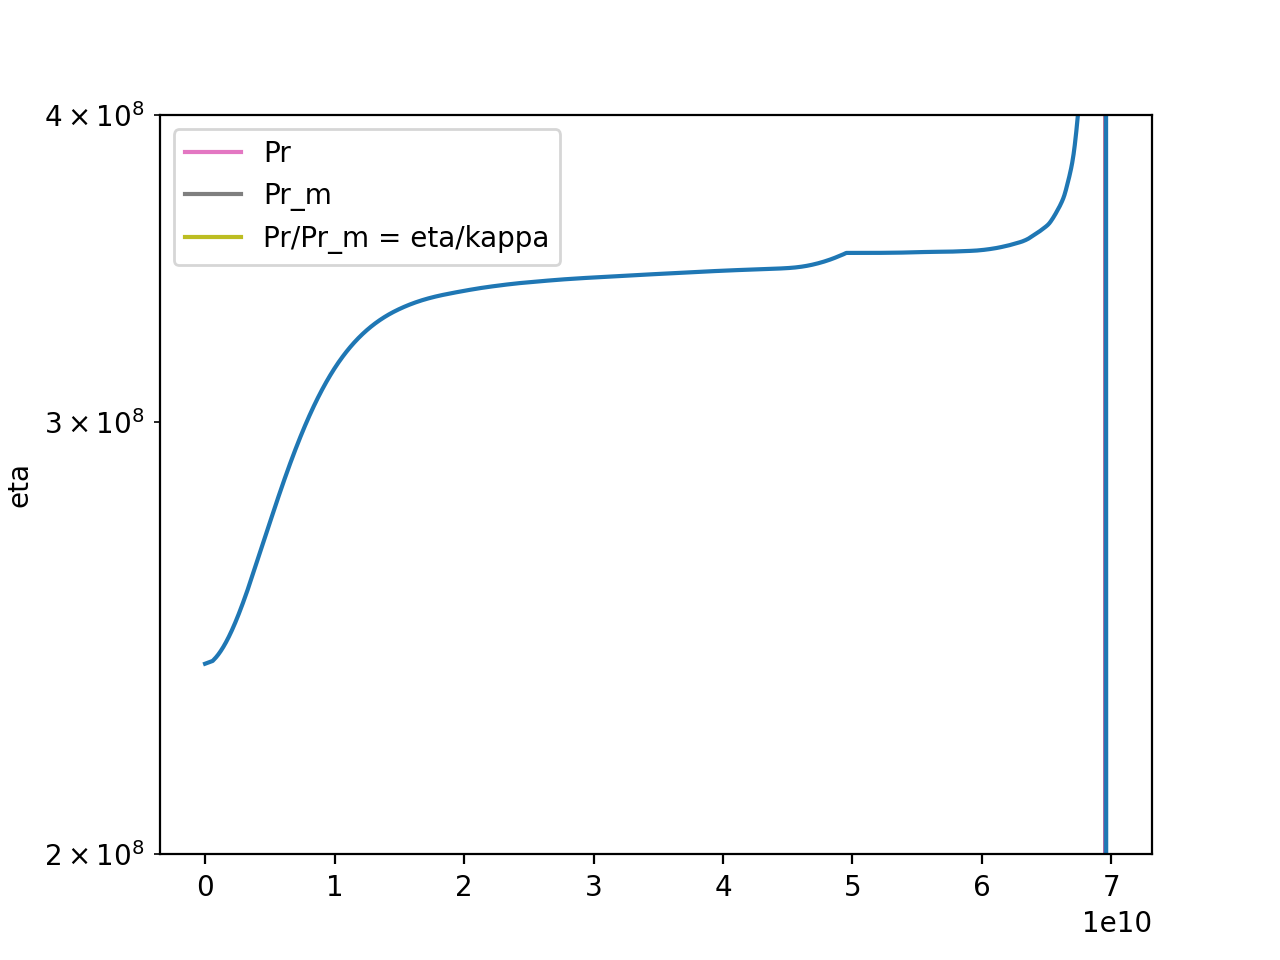

(0.0, 6.0)

In [4]:
plt.plot(di.rr, di.nu)
plt.ylabel('viscosity')
plt.ylim(0,6)

In [5]:
plt.plot(di.rr, di.kappa)
plt.ylim(1e3, 1e8)
plt.ylabel('k_rad')
plt.yscale('log')

In [6]:
plt.plot(di.rr, di.eta)
plt.ylabel('eta')
plt.yscale('log')

In [7]:
# see what they all look like on same scale
plt.plot(di.rr, di.nu)
plt.plot(di.rr, di.kappa)
plt.plot(di.rr, di.eta)
plt.ylim(0.1,1e8)
plt.yscale('log')

In [8]:
# plot Prandtl numbers
plt.plot(di.rr, di.pr, label='Pr')
plt.plot(di.rr, di.prm, label='Pr_m')
plt.plot(di.rr, di.pr/di.prm, label='Pr/Pr_m = eta/kappa')
plt.legend()
plt.ylim(1e-8, 100)
plt.yscale('log')

In [9]:
# plot opacity
plt.plot(di.rr, di.opa)
plt.yscale('log')
plt.ylim(1, 1e6)

(1, 1000000.0)

In [10]:
# plot opacity
plt.plot(di.rr, di.c_p)
plt.ylim(2e8,4e8)

(200000000.0, 400000000.0)

<IPython.core.display.Javascript object>


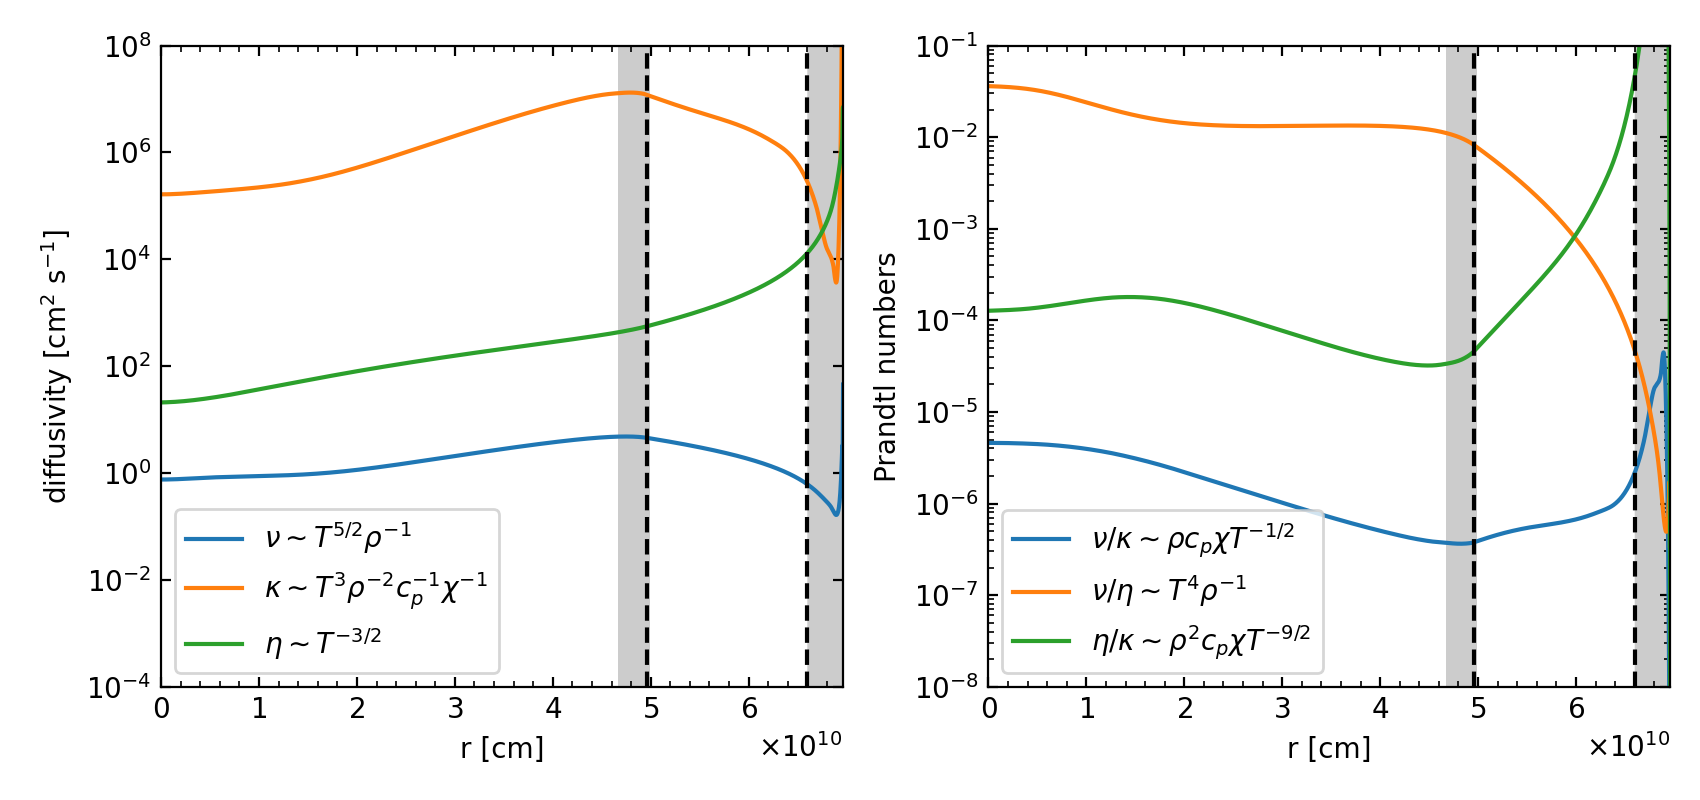

In [11]:
# let's make nice plot of diffusions and Prandtl numbers
fig, axs = plt.subplots(1, 2, figsize=(8.5, 4.))
axs = axs.flatten()
ax1, ax2 = axs
#ax1, ax2, ax3, ax4 = axs

# plot the diffusivities
ax1.plot(di.rr, di.nu, label=r'$\nu\sim T^{5/2}\rho^{-1}$')
ax1.plot(di.rr, di.kappa, label=r'$\kappa\sim T^3\rho^{-2}c_p^{-1}\chi^{-1}$')
ax1.plot(di.rr, di.eta, label=r'$\eta\sim T^{-3/2}$')
ax1.legend(loc='lower left')

# set y limits and scaling
y1, y2 = 1e-4, 1e8
ax1.set_ylim(y1, y2)
ax1.set_yscale('log')
ax1.set_ylabel('diffusivity ' + r'$\rm{[cm^2\ s^{-1}]}$')

# plot the Prandtl numbers
ax2.plot(di.rr, di.pr, label=r'$\nu/\kappa\sim \rho c_p\chi T^{-1/2}$')
ax2.plot(di.rr, di.prm, label=r'$\nu/\eta\sim T^4\rho^{-1}$')
ax2.plot(di.rr, di.pr/di.prm, label=r'$\eta/\kappa\sim\rho^2c_p\chi T^{-9/2}$')
ax2.legend(loc='lower left')

# set y limits and scaling
y1, y2 = 1e-8, 1e-1
ax2.set_ylim(y1, y2)
ax2.set_yscale('log')
ax2.set_ylabel('Prandtl numbers')

# mark some values for the top row:
for ax in [ax1, ax2]:
    npoints = 100
    y1, y2 = ax.get_ylim()
    yvals = np.linspace(y1, y2, npoints)

    # plot base of CZ and cut radius
    for rval in [di.rbcz, di.rcut]:
        ax.plot(rval + np.zeros(npoints), yvals, 'k--')


    # shade the non-ideal layer
    ax.fill_between(di.rr[:di.ircut], di.rr[:di.ircut]*0 + y1, di.rr[:di.ircut]*0 + y2, fc="k", alpha=0.2)

    # shade the tachocline
    ax.fill_between(di.rr[di.irtach2:di.irtach1], di.rr[di.irtach2:di.irtach1]*0 + y1,\
                     di.rr[di.irtach2:di.irtach1]*0 + y2, fc="k", alpha=0.2)

    # set x limits
    ax.set_xlim(0, di.rsun)

    # set x label 
    ax.set_xlabel('r [cm]')

for ax in axs:
    plt.sca(ax)
    plt.minorticks_on()
    plt.tick_params(top=True, right=True, direction='in', which='both')
    plt.ticklabel_format(useMathText=True, axis='x', scilimits=(0,0)    )

plt.tight_layout()

plt.savefig('plots/Model_S_diffusions.png', dpi=300)

In [12]:
print("nu tach = %1.3e" %di.nu[di.irtach])
print("kappa tach = %1.3e" %di.kappa[di.irtach])
print("eta tach = %1.3e" %di.eta[di.irtach])

print("delta nu tach = %.3f" %np.abs((di.nu[di.irtach1] - di.nu[di.irtach2])/di.nu[di.irtach]))
print("delta kappa tach = %.3f" %np.abs((di.kappa[di.irtach1] - di.kappa[di.irtach2])/di.kappa[di.irtach]))
print("delta eta tach = %.3f" %np.abs((di.eta[di.irtach1] - di.eta[di.irtach2])/di.eta[di.irtach]))

nu tach = 4.795e+00
kappa tach = 1.316e+07
eta tach = 4.887e+02
delta nu tach = 0.069
delta kappa tach = 0.100
delta eta tach = 0.302


In [13]:
# cool...things don't really vary across tachocline
print ("nu/kappa tach = %1.3e" %di.pr[di.irtach])
print ("nu/eta tach = %1.3e" %di.prm[di.irtach])
print ("eta/kappa tach = %1.3e" %(di.pr/di.prm)[di.irtach])

nu/kappa tach = 3.643e-07
nu/eta tach = 9.811e-03
eta/kappa tach = 3.713e-05


20.96177051027703 583.359848945034
